In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

In [194]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [195]:
print(df.shape)
print(df.info())

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


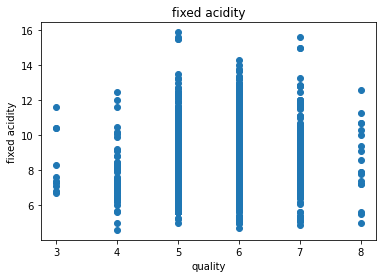

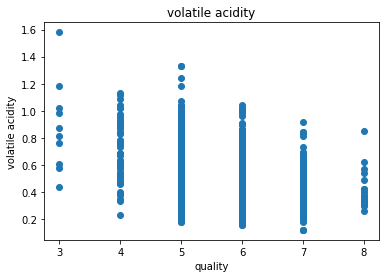

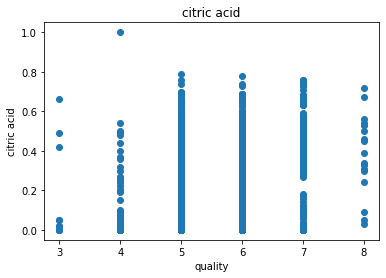

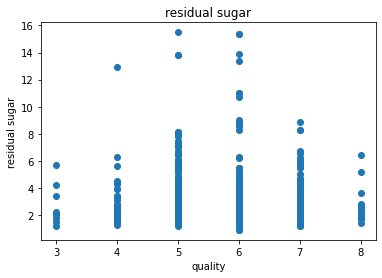

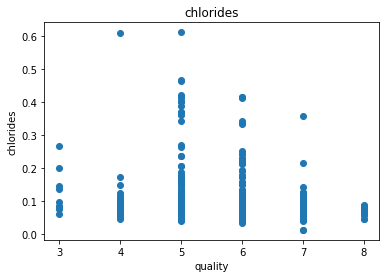

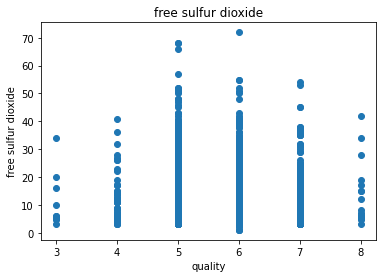

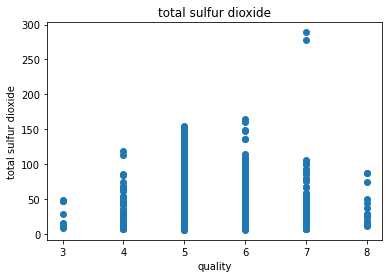

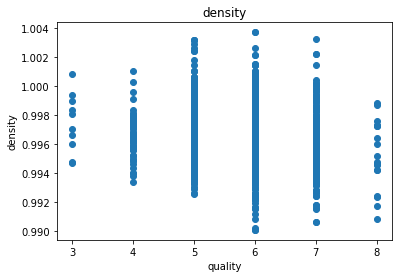

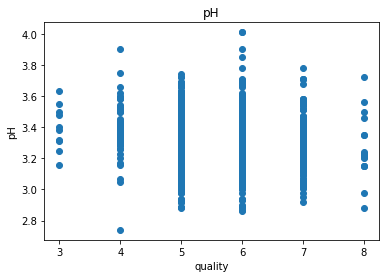

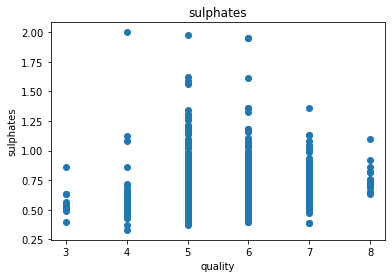

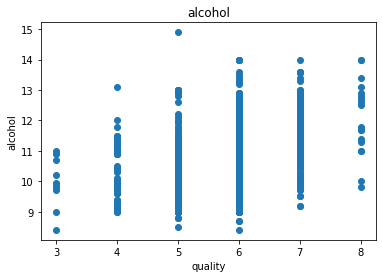

In [196]:
#Explore all Attributes by Wine Quality
for label in df.columns[:-1]:
    plt.scatter(df['quality'], df[label])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.savefig('imgs/'+'red'.join(label.split(' ')))
    plt.show()
    

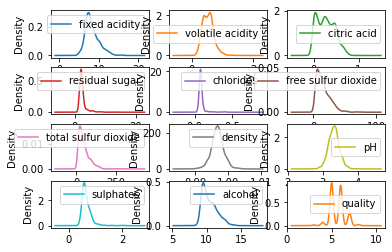

In [197]:
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.savefig('imgs/density/'+'redDensity'.join(label.split(' ')))
plt.show()

In [198]:
#Correlation Matrix
corr_matrix = df.corr()
print(corr_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [199]:
print(df.columns)
print(df[df.columns[0]].size)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
1599


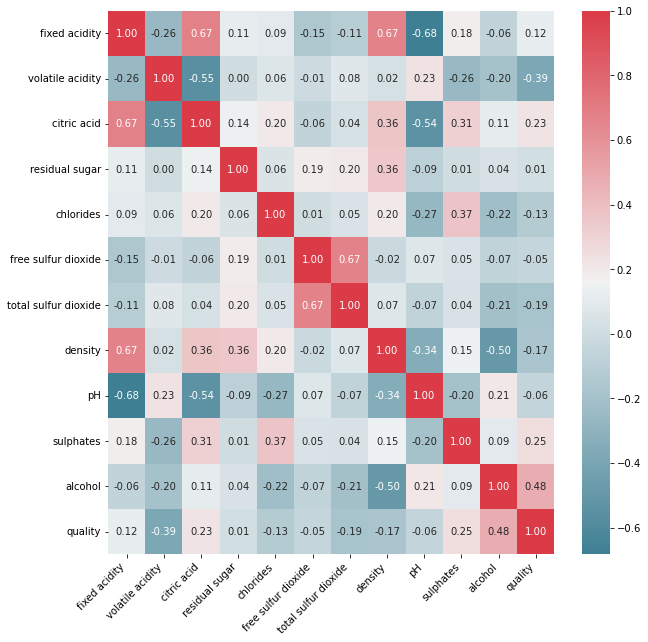

In [200]:
#Column Names

column_names = df.columns

#Figure Size
fig,ax = plt.subplots(figsize=(10,10))

colormap = sns.diverging_palette(220,10, as_cmap=True);

sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f");

ax.set_xticklabels(column_names, rotation=45, horizontalalignment="right");
plt.savefig('imgs/matrix/'+'redCorrelationMatrix'.join(label.split(' ')))
plt.show()

In [201]:
bins = [0, 5.5, 7.5, 10] 
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [202]:
df.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

In [203]:
#Here we need to convert the Quality to an Int64
#['quality'] = df['quality'].astype('category').cat.codes

In [232]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=51)


In [233]:
for data in [y_train, y_test]:
    print(data.describe())

count     1039
unique       3
top          1
freq       547
Name: quality, dtype: int64
count     560
unique      3
top         1
freq      290
Name: quality, dtype: int64


In [234]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       262
           1       0.77      0.84      0.81       290
           2       1.00      0.12      0.22         8

    accuracy                           0.79       560
   macro avg       0.86      0.57      0.60       560
weighted avg       0.80      0.79      0.79       560



In [245]:
#Naive Bayes (GaussianNB)
x = df[df.columns[:-1]]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=51)
gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [246]:
print("Number of mislabeled points out of a total %d points : %d"  % (X_test.shape[0], (y_test != y_pred).sum()))
print("Naive Bayes Accuracy: " + str((1 - (y_test != y_pred).sum() /X_test.shape[0]) *100) + "%")
print(classification_report(y_test, y_pred))

Number of mislabeled points out of a total 480 points : 132
Naive Bayes Accuracy: 72.5%
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       217
           1       0.74      0.74      0.74       255
           2       0.11      0.12      0.12         8

    accuracy                           0.73       480
   macro avg       0.53      0.53      0.53       480
weighted avg       0.73      0.72      0.73       480

